In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

df = pd.read_csv("9683.csv")
df

,t,Ax,Ay,Bx,By
0,0.000000,329.3179,-61.94881,404.1580,-133.03530
1,0.004696,329.4612,-61.85218,404.2205,-132.89230
2,0.009393,329.5278,-61.76446,404.1926,-132.84040
3,0.014089,329.6122,-61.54738,404.2671,-132.76420
4,0.018786,329.6676,-60.07535,404.2708,-131.50150
...,...,...,...,...,...
125,0.587048,-756.6727,93.67218,-856.3259,123.46490
126,0.591744,-774.7136,76.36980,-873.0507,109.82480
127,0.596441,-792.0143,58.65655,-889.3876,94.62582
128,0.601137,-809.6449,40.46543,-906.0766,78.62682


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


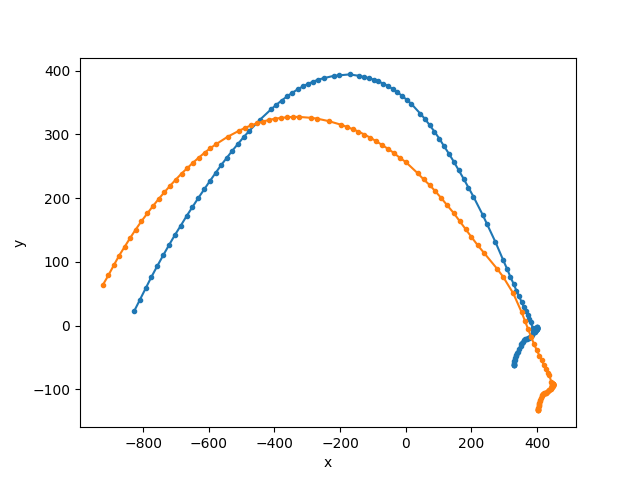

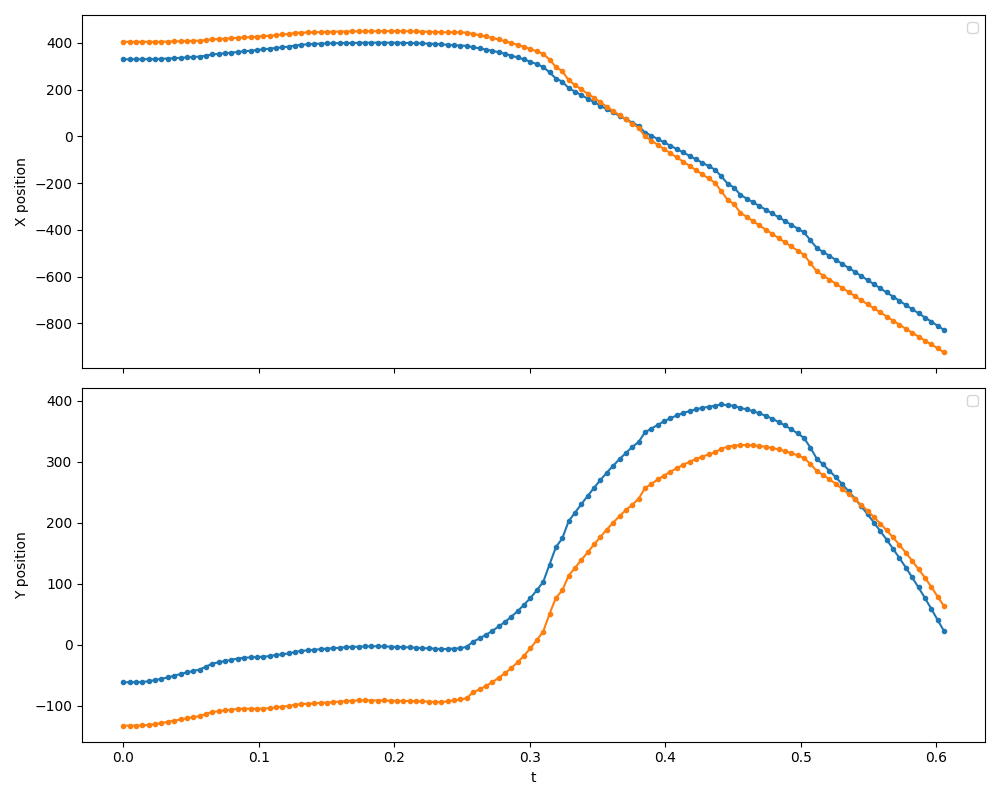

In [28]:
plt.figure()
plt.plot(df['Ax'], df['Ay'], marker='.')
plt.plot(df['Bx'], df['By'], marker='.')
plt.xlabel('x')
plt.ylabel('y')


from scipy import signal

def butterworth_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = signal.filtfilt(b, a, data)
    return filtered_data

# Estimate sampling frequency
fs = 1 / (df['t'].iloc[1] - df['t'].iloc[0])

# Apply Butterworth filter to Ax, Bx, Ay, By
cutoff = 10  # Adjust this value based on your needs
df['Ax_filtered'] = butterworth_filter(df['Ax'], cutoff, fs)
df['Bx_filtered'] = butterworth_filter(df['Bx'], cutoff, fs)
df['Ay_filtered'] = butterworth_filter(df['Ay'], cutoff, fs)
df['By_filtered'] = butterworth_filter(df['By'], cutoff, fs)

# # Apply low-pass filter
# def low_pass_filter(data, alpha=0.5):
#     filtered = [data[0]]
#     for i in range(1, len(data)):
#         filtered.append(alpha * data[i] + (1 - alpha) * filtered[i-1])
#     return filtered

# # Apply low-pass filter to Ax, Bx, Ay, By
# df['Ax_filtered'] = low_pass_filter(df['Ax'])
# df['Bx_filtered'] = low_pass_filter(df['Bx'])
# df['Ay_filtered'] = low_pass_filter(df['Ay'])
# df['By_filtered'] = low_pass_filter(df['By'])

# Plot low-pass filtered versions
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
axs[0].plot(df['t'], df['Ax'], marker='.')
axs[0].plot(df['t'], df['Bx'], marker='.')
axs[1].plot(df['t'], df['Ay'], marker='.')
axs[1].plot(df['t'], df['By'], marker='.')
plt.xlabel('t')

# axs[0].plot(df['t'], df['Ax_filtered'], label='Ax (filtered)')
# axs[0].plot(df['t'], df['Bx_filtered'], label='Bx (filtered)')
axs[0].set_ylabel('X position')
axs[0].legend()

# axs[1].plot(df['t'], df['Ay_filtered'], label='Ay (filtered)')
# axs[1].plot(df['t'], df['By_filtered'], label='By (filtered)')
axs[1].set_ylabel('Y position')
axs[1].legend()

axs[1].set_xlabel('t')
plt.tight_layout()

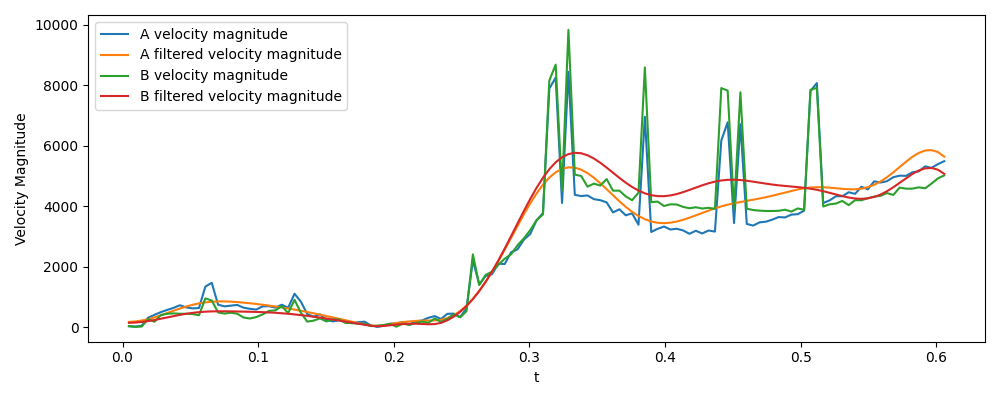

In [27]:
# Calculate velocity magnitude of A using x position Ax and y position Ay
df['Ax_velocity'] = df['Ax'].diff() / df['t'].diff()
df['Ay_velocity'] = df['Ay'].diff() / df['t'].diff()
df['A_velocity_magnitude'] = (df['Ax_velocity']**2 + df['Ay_velocity']**2)**0.5

# Calculate velocity magnitude of A using x position Ax_filtered and y position Ay_filtered
df['Ax_filtered_velocity'] = df['Ax_filtered'].diff() / df['t'].diff()
df['Ay_filtered_velocity'] = df['Ay_filtered'].diff() / df['t'].diff()
df['A_filtered_velocity_magnitude'] = (df['Ax_filtered_velocity']**2 + df['Ay_filtered_velocity']**2)**0.5

# Calculate velocity magnitude of B using x position Bx and y position By
df['Bx_velocity'] = df['Bx'].diff() / df['t'].diff()
df['By_velocity'] = df['By'].diff() / df['t'].diff()
df['B_velocity_magnitude'] = (df['Bx_velocity']**2 + df['By_velocity']**2)**0.5

# Calculate velocity magnitude of B using x position Bx_filtered and y position By_filtered
df['Bx_filtered_velocity'] = df['Bx_filtered'].diff() / df['t'].diff()
df['By_filtered_velocity'] = df['By_filtered'].diff() / df['t'].diff()
df['B_filtered_velocity_magnitude'] = (df['Bx_filtered_velocity']**2 + df['By_filtered_velocity']**2)**0.5

# Plot velocity magnitude of A
plt.figure(figsize=(10, 4))
plt.plot(df['t'], df['A_velocity_magnitude'], label='A velocity magnitude')
plt.plot(df['t'], df['A_filtered_velocity_magnitude'], label='A filtered velocity magnitude')

# Plot velocity magnitude of B
plt.plot(df['t'], df['B_velocity_magnitude'], label='B velocity magnitude')
plt.plot(df['t'], df['B_filtered_velocity_magnitude'], label='B filtered velocity magnitude')

plt.xlabel('t')
plt.ylabel('Velocity Magnitude')
plt.legend()
plt.tight_layout()


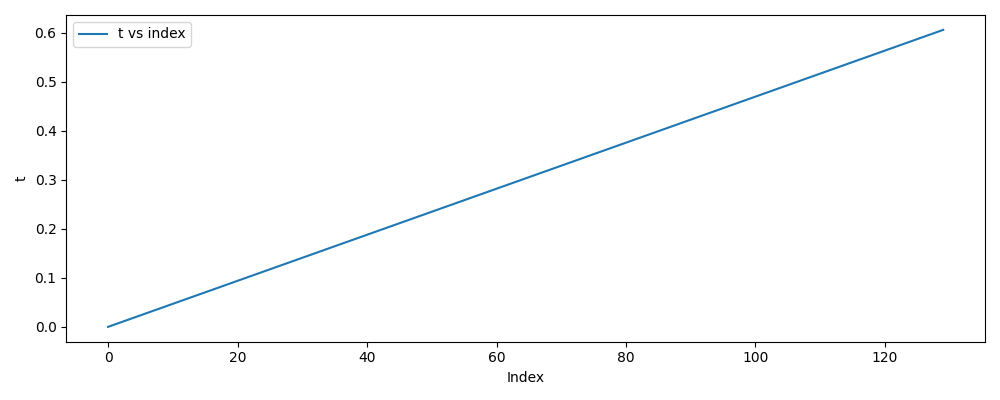

In [29]:
# Plot df['t'] against the index
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['t'], label='t vs index')
plt.xlabel('Index')
plt.ylabel('t')
plt.legend()
plt.tight_layout()
